# Read files

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/augmentedDataWithoutStemming.csv')
dfStem=pd.read_csv('/content/augmentedDataWithStemming.csv')

In [ ]:
df

,Unnamed: 0,Unnamed: 0.1,Name,Genres,Summary
0,0,1,A Clockwork Orange,Science Fiction,alex teenager living near future england lead...
1,1,6,A Wizard of Earthsea,Children's literature,ged young boy gont one larger islands north a...
2,2,8,Blade Runner 3: Replicant Night,Science Fiction,living mars deckard acting consultant movie c...
3,3,9,Blade Runner 2: The Edge of Human,Science Fiction,beginning several months events blade runner ...
4,4,21,Children of Dune,Science Fiction,nine years emperor paul muad dib walked deser...
...,...,...,...,...,...
21864,21864,16414,Carver,Thriller,central character samuel carver ex assassin s...
21865,21865,16442,Rabies,Thriller,seth betimes 1980s height insensate war novel...
21866,21866,16542,The Bourne Imperative,Thriller,detailed background main character see jason ...
21867,21867,16551,Remote Control,Thriller,series follows character nick stone ex milita...


In [ ]:
X=df.Summary
Y=df.Genres.values
X.shape, Y.shape

((21869,), (21869,))

In [ ]:
dfStem

,Unnamed: 0,Unnamed: 0.1,Name,Genres,Summary
0,0,1,A Clockwork Orange,Science Fiction,alex teenag live near futur england lead gang...
1,1,6,A Wizard of Earthsea,Children's literature,ged young boy gont one larger island north ar...
2,2,8,Blade Runner 3: Replicant Night,Science Fiction,live mar deckard act consult movi crew film s...
3,3,9,Blade Runner 2: The Edge of Human,Science Fiction,begin sever month event blade runner deckard ...
4,4,21,Children of Dune,Science Fiction,nine year emperor paul muad dib walk desert b...
...,...,...,...,...,...
21864,21864,16414,Carver,Thriller,central charact samuel carver ex assassin sto...
21865,21865,16442,Rabies,Thriller,seth betim one thousand nine hundr eighti hei...
21866,21866,16542,The Bourne Imperative,Thriller,detail background main charact see jason bour...
21867,21867,16551,Remote Control,Thriller,seri follow charact nick stone ex militari ma...


In [ ]:
XStem=dfStem.Summary
YStem=dfStem.Genres.values
XStem.shape, YStem.shape

((21869,), (21869,))

# Split the Train and Test Dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

In [ ]:
XStem_train, XStem_test, YStem_train, YStem_test = train_test_split(XStem, YStem, test_size=0.3, random_state = 42)

# SGD Classifier

## Without Stemming and Lemmatization

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer(ngram_range=(1,3))),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, Y_train)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 3))),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [ ]:
Y_pred = sgd.predict(X_test)

In [ ]:
print('accuracy %s' % accuracy_score(Y_pred, Y_test))
print(classification_report(Y_test, Y_pred))

accuracy 0.8425544886450236
                        precision    recall  f1-score   support

       Adventure novel       0.95      1.00      0.97       211
             Biography       0.89      1.00      0.94       112
 Children's literature       0.69      0.53      0.60       330
               Fantasy       0.84      0.84      0.84       361
                Horror       0.92      1.00      0.96       299
      Literary fiction       0.98      1.00      0.99        85
                Memoir       0.95      1.00      0.97       145
               Mystery       0.79      0.87      0.83       452
           Non-fiction       0.90      1.00      0.95       466
                 Novel       0.58      0.09      0.16       296
            Philosophy       0.91      0.99      0.95        74
          Picture book       0.96      0.97      0.97       162
         Romance novel       0.89      1.00      0.94       213
       Science Fiction       0.77      0.75      0.76       283
           

## With Stemming and Lemmatization

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer(ngram_range=(1,3))),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(XStem_train, YStem_train)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 3))),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [ ]:
YStem_pred = sgd.predict(XStem_test)

In [ ]:
print('accuracy %s' % accuracy_score(YStem_pred, YStem_test))
print(classification_report(YStem_test, YStem_pred))

accuracy 0.837219935985368
                        precision    recall  f1-score   support

       Adventure novel       0.94      1.00      0.97       211
             Biography       0.90      1.00      0.95       112
 Children's literature       0.70      0.50      0.58       330
               Fantasy       0.80      0.85      0.83       361
                Horror       0.89      0.99      0.94       299
      Literary fiction       1.00      1.00      1.00        85
                Memoir       0.94      1.00      0.97       145
               Mystery       0.79      0.87      0.83       452
           Non-fiction       0.87      1.00      0.93       466
                 Novel       0.57      0.08      0.15       296
            Philosophy       0.92      0.97      0.95        74
          Picture book       0.95      0.98      0.96       162
         Romance novel       0.90      1.00      0.95       213
       Science Fiction       0.78      0.74      0.76       283
           S

# LinearSVC Classifier

## Without Stemming and Lemmatization:

In [ ]:
from sklearn.svm import LinearSVC

linear_svc = Pipeline([('vect', CountVectorizer(ngram_range=(1,3))),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(random_state=0, tol=1e-5)),
               ])
linear_svc.fit(X_train, Y_train)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 3))),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(random_state=0, tol=1e-05))])

In [ ]:
Y_pred = linear_svc.predict(X_test)

In [ ]:
print('accuracy %s' % accuracy_score(Y_pred, Y_test))
print(classification_report(Y_test, Y_pred))

accuracy 0.873190062490474
                        precision    recall  f1-score   support

       Adventure novel       0.98      1.00      0.99       211
             Biography       0.97      1.00      0.99       112
 Children's literature       0.66      0.66      0.66       330
               Fantasy       0.86      0.89      0.88       361
                Horror       0.99      1.00      1.00       299
      Literary fiction       0.99      1.00      0.99        85
                Memoir       0.99      1.00      1.00       145
               Mystery       0.89      0.89      0.89       452
           Non-fiction       0.95      1.00      0.98       466
                 Novel       0.51      0.19      0.27       296
            Philosophy       0.95      1.00      0.97        74
          Picture book       0.99      0.98      0.99       162
         Romance novel       0.98      1.00      0.99       213
       Science Fiction       0.81      0.78      0.79       283
           S

## With Stemming and Lemmatization

In [ ]:
from sklearn.svm import LinearSVC

linear_svc = Pipeline([('vect', CountVectorizer(ngram_range=(1,3))),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(random_state=0, tol=1e-5)),
               ])
linear_svc.fit(XStem_train, YStem_train)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 3))),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(random_state=0, tol=1e-05))])

In [ ]:
YStem_pred = linear_svc.predict(XStem_test)

In [ ]:
print('accuracy %s' % accuracy_score(YStem_pred, YStem_test))
print(classification_report(YStem_test, YStem_pred))

accuracy 0.8710562414266118
                        precision    recall  f1-score   support

       Adventure novel       0.98      1.00      0.99       211
             Biography       0.98      1.00      0.99       112
 Children's literature       0.65      0.64      0.64       330
               Fantasy       0.85      0.89      0.87       361
                Horror       0.99      1.00      0.99       299
      Literary fiction       1.00      1.00      1.00        85
                Memoir       0.99      1.00      1.00       145
               Mystery       0.87      0.89      0.88       452
           Non-fiction       0.95      1.00      0.97       466
                 Novel       0.49      0.17      0.25       296
            Philosophy       0.97      1.00      0.99        74
          Picture book       1.00      0.99      1.00       162
         Romance novel       1.00      1.00      1.00       213
       Science Fiction       0.82      0.78      0.80       283
           

# Comparison:

Text(0.5, 0, 'Models')

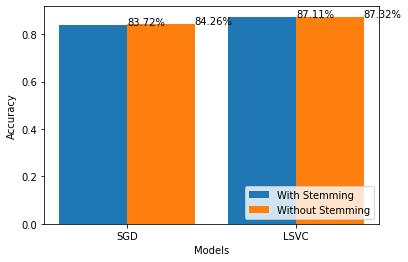

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

accSGD=0.8425544886450236
accSGDStem=0.837219935985368
accLSVC=0.873190062490474
accLSVCStem=0.8710562414266118

# create data
x = np.arange(2)
y1 = [accSGDStem, accLSVCStem]
y2 = [accSGD, accLSVC]
width = 0.40
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y2, width)
plt.xticks([0,1],["SGD", "LSVC"])
plt.legend(['With Stemming','Without Stemming'],loc="lower right");
plt.annotate("{:.2%}".format(accSGDStem), (0, accSGDStem))
plt.annotate("{:.2%}".format(accSGD), (0.40, accSGD))
plt.annotate("{:.2%}".format(accLSVCStem), (1, accLSVCStem))
plt.annotate("{:.2%}".format(accLSVC), (1.40, accLSVC))
plt.ylabel('Accuracy')
plt.xlabel('Models')